# Twitter Graphs
## Table of Contents
* [Visualizations](#1)
* [Global Statistics](#2)
* [Page Rank - Demo on subset](#3)

In [1]:
!pip install pyvis

In [2]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# graph
import networkx as nx
from pyvis.network import Network

In [3]:
# load edge data
t1 = time.time()
df = pd.read_csv('../input/twitter-edge-nodes/Twitter-dataset/data/edges.csv', 
                 header=None, names=['Follower','Target'])
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Elapsed time [s]:  37.95


### (1,2) means user (follower) with id "1" is following user (target) with id "2".

In [4]:
# preview
df

,Follower,Target
0,1,11553
1,1,8762940
2,1,8762941
3,1,688136
4,1,8762942
...,...,...
85331840,8762935,143150
85331841,8762936,8217613
85331842,8762937,8217613
85331843,8762938,8217613


<a id='1'></a>
# Visualizations

### Filter by follower

In [5]:
follower = 1
df_select = df[df.Follower==follower]
df_select

,Follower,Target
0,1,11553
1,1,8762940
2,1,8762941
3,1,688136
4,1,8762942


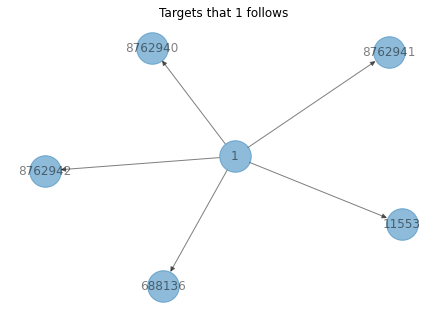

In [6]:
# create graph from edges
G = nx.from_pandas_edgelist(df_select, 'Follower', 'Target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Targets that ' + str(follower) + ' follows')
plt.show()

### Get all followers of a target

In [7]:
target = 3
df_select = df[df.Target==target]
df_select

,Follower,Target
48155330,4,3
48156324,5,3
48158275,6,3
48159154,7,3
48159192,8,3
48159607,9,3
48160511,10,3
48160552,11,3
48161203,12,3
48161254,13,3


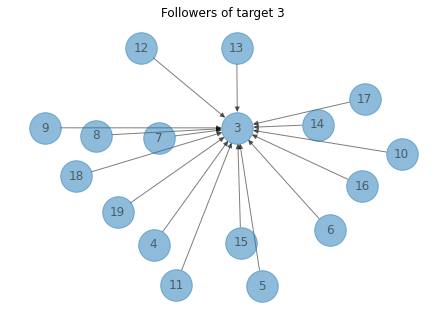

In [8]:
# create graph from edges
G = nx.from_pandas_edgelist(df_select, 'Follower', 'Target', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Followers of target ' + str(target))
plt.show()

### Bidirectional

In [9]:
user = 100
df_out = df[df.Follower==user]
df_in = df[df.Target==user]
df_select = pd.concat([df_in,df_out])
df_select

,Follower,Target
6769913,777202,100
21657538,126698,100
21930021,699,100
21963858,245669,100
23000793,8079,100
30902596,626186,100
48182361,100,41
48182362,100,22756
48182363,100,85690
48182364,100,777202


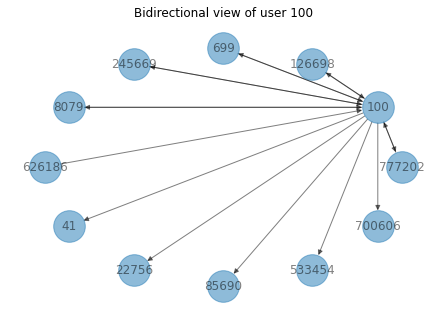

In [10]:
# create graph from edges
G = nx.from_pandas_edgelist(df_select, 'Follower', 'Target', create_using=nx.DiGraph())
# and plot
nx.draw_circular(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Bidirectional view of user ' + str(user))
plt.show()

#### Interactive Plot:

In [11]:
net = Network(notebook=True, width='800px', height='500px')
net.directed = True
net.from_nx(G)
net.show('example.html')

<a id='2'></a>
# Global Statistics

### Most active followers

In [12]:
# frequency table
f_counts = df.Follower.value_counts().rename_axis('Follower').reset_index(name='Frequency')

# top 10
f_counts[0:10]

,Follower,Frequency
0,3493,214381
1,1693,201006
2,3402,180373
3,4018,165718
4,16201,156819
5,1450,151391
6,3487,147329
7,55567,137135
8,56382,131936
9,132335,123533


In [13]:
# stats
f_counts.Frequency.describe()

count    8.768419e+06
mean     9.731725e+00
std      3.410203e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.143810e+05
Name: Frequency, dtype: float64

#### Interpretation: A follower has in average 9.73 targets.

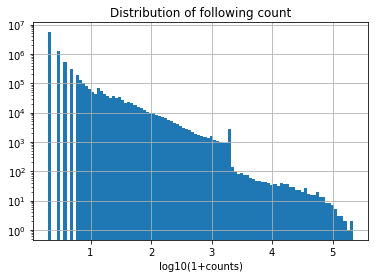

In [14]:
# plot in log scale
plt.hist(np.log10(1+f_counts.Frequency),100)
plt.yscale('log')
plt.grid()
plt.title('Distribution of following count')
plt.xlabel('log10(1+counts)')
plt.show()

### Most followed targets

In [15]:
# frequency table
t_counts = df.Target.value_counts().rename_axis('Target').reset_index(name='Frequency')

# top 10
t_counts[0:10]

,Target,Frequency
0,5994113,564512
1,7496,350885
2,1349110,341963
3,3493,212494
4,3402,196882
5,1629776,172231
6,4018,158041
7,8121005,155967
8,2041453,152689
9,16201,148619


In [16]:
# stats
t_counts.Frequency.describe()

count    6.626985e+06
mean     1.287642e+01
std      5.378080e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.645120e+05
Name: Frequency, dtype: float64

#### Interpretation: A target has in average 12.88 followers.

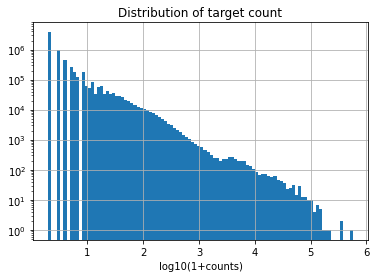

In [17]:
# plot in log scale
plt.hist(np.log10(1+t_counts.Frequency),100)
plt.yscale('log')
plt.grid()
plt.title('Distribution of target count')
plt.xlabel('log10(1+counts)')
plt.show()

<a id='3'></a>
# Pagerank - Demo on subset

### The full graph would be too big for the 16GB memory environment, so we are just making a demo on a small subset.

In [18]:
# select subset
df_sub = df.sample(100000, random_state=987)

In [19]:
# build graph from data frame
G = nx.from_pandas_edgelist(df_sub, 'Follower', 'Target', create_using=nx.DiGraph())

In [20]:
# calc pagerank for each node
pageranks = nx.pagerank(G)

# convert to data frame
pageranks = pd.DataFrame.from_dict(pageranks, orient='index',
                                  columns=['Pagerank'])
# and sort by pagerank
pageranks = pageranks.sort_values(by=['Pagerank'], ascending=False)

In [21]:
# show top 10
pageranks[0:10]

,Pagerank
5994113,0.003268
1928416,0.002417
7496,0.002098
1349110,0.001749
3493,0.001104
3402,0.001036
1629776,0.000979
2041453,0.000869
4018,0.000866
8121005,0.000847


### Compare with simple frequency count:

In [22]:
# frequency table / top 10
t_counts_sub = df_sub.Target.value_counts().rename_axis('Target').reset_index(name='Frequency')
t_counts_sub[0:10]

,Target,Frequency
0,5994113,695
1,7496,448
2,1349110,372
3,3493,236
4,3402,216
5,1629776,200
6,2041453,187
7,4018,185
8,8121005,179
9,216481,164
